<a href="https://www.kaggle.com/code/hatemamine/v2-scotuslexglue-preprocesslongtextwithkeybert?scriptVersionId=132020572" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install keybert --quiet
from keybert import KeyBERT
from datasets import load_dataset
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas 
import numpy as np 
import re
import matplotlib
import seaborn as sb 
import time

In [2]:
#get the number of words 
def getNumberOfWords(df):
    maxl=[]
    for i in range(len(df)):
        x= df["ATexte"][i].split()
        if len(x)< 3: print(i)
        maxl.append(len(x))
    print("Max value element : ", max(maxl))
    print("Min value element : ", min(maxl))
    return maxl
    

In [3]:
def plot_NumberOfWord(maxl, dataset_name):
    fig = plt.figure()
    ax1 = plt.axes()
    ax1.set_ylabel('words count')
    ax1.set_xlabel('instances')
    ind = np.arange(len(maxl))
    line, =ax1.plot(ind,maxl)
    plt.axhline(y=512, color="red", linestyle="--")
    fig.savefig(dataset_name+"words count.png")
    plt.show()

In [4]:
def plotNumberSampleforeachCLASS(df, dataset_name):
    sb.countplot(df.MotsCles)
    matplotlib.pyplot.ylabel("Number of samples per Class")
    matplotlib.pyplot.xlabel("Class label")
    matplotlib.pyplot.savefig(dataset_name+'distribution.png')
    plt.show()

In [5]:
def PreprocessLongTextwithKeyBERT(df, n_gram):
    kw_model = KeyBERT()
    start_time = time.time()
    for i in tqdm(range(len(df))):
        tmpnewtext=""
        x= df["ATexte"][i].split()
        #if len(x) < 513 : continue 
        textgen=""
        for j in range(len(x)):
            textgen =textgen +" "+x[j]
            if j ==0:continue # for not process the first empty string
            if (j % 512 ==0) or (len(x)-1==j): 
                keygen = kw_model.extract_keywords(textgen, keyphrase_ngram_range=(n_gram, n_gram), stop_words='english', use_mmr=True, diversity=0.9, top_n=int(max(1, round((512*512)/(len(x)*1), 0))))
                textgen=""
                for y in range(len(keygen)):
                    tmpnewtext=tmpnewtext +" "+keygen[y][0]
                #print(keygen[y][0])
        df["ATexte"][i]=tmpnewtext
        #break
    print("--- %s seconds ---" % (time.time() - start_time))
    return df

In [6]:
def plotNumberSampleforeachCLASS(df, dataset_name):
    plot_=sb.countplot(df.MotsCles)
    #new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
    #matplotlib.pyplot.xticks(range(0, len(new_ticks), 10), new_ticks[::10], rotation='vertical')
    matplotlib.pyplot.ylabel("Number of samples per Class")
    matplotlib.pyplot.xlabel("Class label")
    matplotlib.pyplot.savefig(dataset_name+'distribution.png')
    plt.show()

In [7]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

Downloading:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/105M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset lex_glue downloaded and prepared to /root/.cache/huggingface/datasets/lex_glue/scotus/1.0.0/c3c0bd7433b636dc39ae49a84dc401190c73156617efc415b04e9835a93a7043. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

train 5000 sample


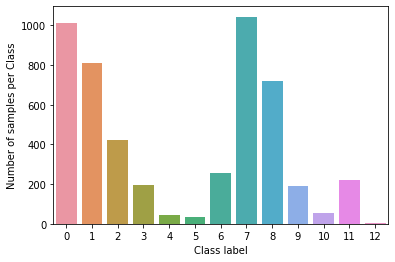

Max value element :  81403
Min value element :  9


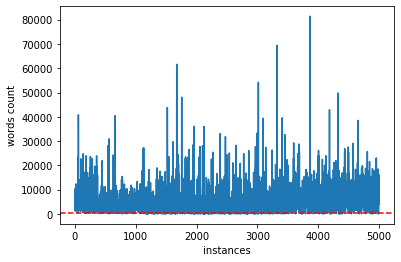

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

--- 7487.470244884491 seconds ---


  0%|          | 0/5000 [00:00<?, ?it/s]

--- 2820.89150762558 seconds ---
Max value element :  585
Min value element :  7


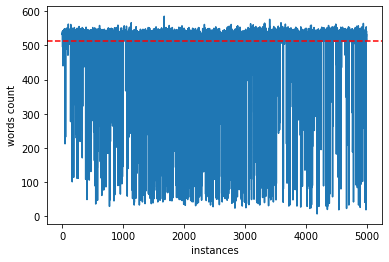

test 1400 sample


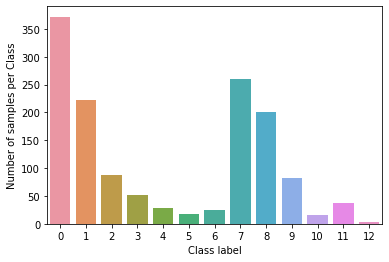

Max value element :  82998
Min value element :  25


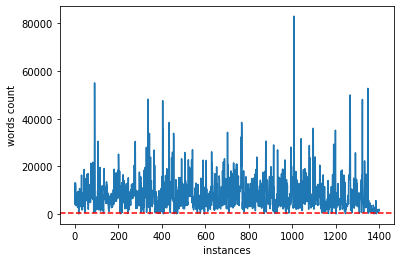

  0%|          | 0/1400 [00:00<?, ?it/s]

--- 3394.4754359722137 seconds ---


  0%|          | 0/1400 [00:00<?, ?it/s]

--- 854.3577418327332 seconds ---
Max value element :  600
Min value element :  16


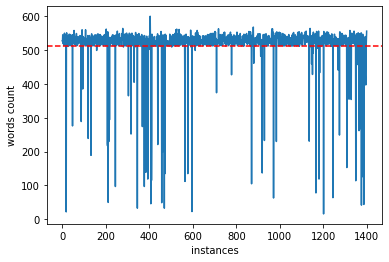

validation 1400 sample


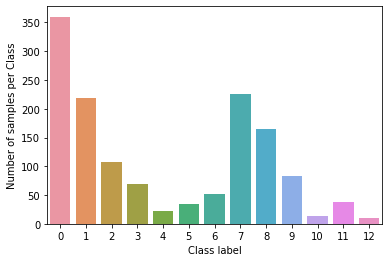

Max value element :  35169
Min value element :  26


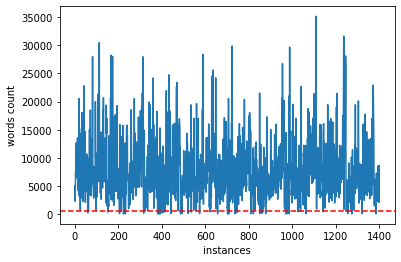

  0%|          | 0/1400 [00:00<?, ?it/s]

--- 3528.507910966873 seconds ---


  0%|          | 0/1400 [00:00<?, ?it/s]

--- 828.807698726654 seconds ---
Max value element :  567
Min value element :  17


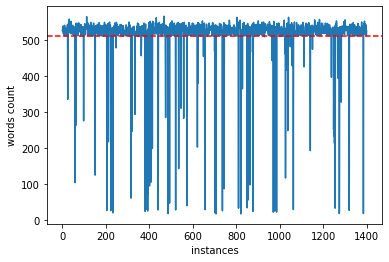

In [8]:
dataset = load_dataset("lex_glue", "scotus")
DATASET_NAME='SCOTUS'
for x in dataset.keys():
    #get the train dataset
    dict = {'ATexte': dataset[x]["text"], 'MotsCles': dataset[x]["label"]}
    df = pandas.DataFrame(dict)
    df["ATexte"]= df["ATexte"].str.lower()
    for i in range(len(df)):
        df["ATexte"][i] = re.sub(r'[^a-z ]', '', df["ATexte"][i])
    print(x,len(df),"sample")
    plotNumberSampleforeachCLASS(df, DATASET_NAME+x)
    plot_NumberOfWord(getNumberOfWords(df), DATASET_NAME+x)
    df.to_csv("/kaggle/working/"+DATASET_NAME+x+".csv")
    df = PreprocessLongTextwithKeyBERT(df, 3)
    df = PreprocessLongTextwithKeyBERT(df, 1)
    plot_NumberOfWord(getNumberOfWords(df), DATASET_NAME+x+"KeyBERT")
    df.to_csv("/kaggle/working/"+DATASET_NAME+x+"KeyBERT.csv")

In [9]:
import pandas 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
#get the train dataset
df = pandas.read_csv("/kaggle/working/SCOTUStrainKeyBERT.csv")
print(len(df))
print(df.head())

5000
   Unnamed: 0                                             ATexte  MotsCles
0           0   refinery regulatory interstate pipe dakota ra...         7
1           1   patent halliburtons industry appliance batche...         7
2           2   courtpetitioners mormon petitions fundamental...         0
3           3   reservation ratifiedpending annulled seized j...         1
4           4   securities subholding holdingcompany affirmed...         7


In [10]:
import random
random.seed(1)
text1=[]
text2=[]
correlated=[]
labels=[]

for i in range (len(df)):
    row0 =df.iloc[i]
    # we exclud label 0 and 1 from the generated dataset for training 
    if row0["MotsCles"]==0 or row0["MotsCles"]==1:continue
    x=0
    y=0
    while x < 30:
        ind = random.randint(0, len(df)-1)
        if i ==ind : continue
        # we exclud label 0 and 1 from the generated dataset for training
        row =df.iloc[ind]
        if row0["MotsCles"]==row["MotsCles"]:
            text1.append(row0["ATexte"])
            text2.append(row["ATexte"])
            correlated.append(1)
            labels.append(str(row0["MotsCles"])+"=="+str(row["MotsCles"]))
            x=x+1
            
        
    while y < 30:
        ind = random.randint(0, len(df)-1)
        if i ==ind : continue
        row =df.iloc[ind]
        if row0["MotsCles"]!=row["MotsCles"]:
            text1.append(row0["ATexte"])
            text2.append(row["ATexte"])
            correlated.append(0)
            labels.append(str(row0["MotsCles"])+"!="+str(row["MotsCles"]))
            y=y+1
    #break
dict = {'ATexte':text1 , 'MotsCles':text2, 'correlated':correlated, 'labels':labels } 
df7 = pandas.DataFrame(dict)              
print(len(df7))
print(df7.head(2))

190680
                                              ATexte  \
0   refinery regulatory interstate pipe dakota ra...   
1   refinery regulatory interstate pipe dakota ra...   

                                            MotsCles  correlated labels  
0   contractor pursuant enforce federal payable m...           1   7==7  
1   capabilityheld regulatory statutes bpt epa su...           1   7==7  


In [11]:
!pip install sentence-transformers --quiet
train, validate = np.split(df7.sample(frac=1, random_state=42),[int(.9*len(df7))])
#print(len(df7))
#print(len(train))
#print(len(validate))
#print(train.head())
from sentence_transformers import InputExample
dev_samples=[]
train_samples=[]
for i in range(len(train)):
        row =train.iloc[i]
        # two input text and the target (1=similarity, 0=disimilarity)
        train_samples.append(InputExample(texts=[row["ATexte"], row["MotsCles"]], label=float(row["correlated"])))
        #break
for i in range(len(validate)):
        row =validate.iloc[i]
        dev_samples.append(InputExample(texts=[row["ATexte"], row["MotsCles"]], label=float(row["correlated"])))
        #break
#print(train_samples[:10])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [12]:
# save the generated dataset in a pickle file 
import pickle
import torch
lexgluescotus = {'train_samples':train_samples, 'dev_samples':dev_samples}
with open('/kaggle/working/key_lexgluescotusFSL01.pickle', 'wb') as handle:
    pickle.dump(lexgluescotus, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
#get the train dataset
df = pandas.read_csv("/kaggle/working/SCOTUStrain.csv")
print(len(df))
print(df.head())

5000
   Unnamed: 0                                             ATexte  MotsCles
0           0   us  sct  led champlin refining covunited stat...         7
1           1   us  sct  led halliburton oil well cementing c...         7
2           2   us  sct  led cleveland et alvunited states th...         0
3           3   us  sct  led united statesvalcea band of till...         1
4           4   us  sct  led american power  light covsecurit...         7


In [14]:
import random
random.seed(1)
text1=[]
text2=[]
correlated=[]
labels=[]

for i in range (len(df)):
    row0 =df.iloc[i]
    # we exclud label 0 and 1 from the generated dataset for training 
    if row0["MotsCles"]==0 or row0["MotsCles"]==1:continue
    x=0
    y=0
    while x < 30:
        ind = random.randint(0, len(df)-1)
        if i ==ind : continue
        # we exclud label 0 and 1 from the generated dataset for training
        row =df.iloc[ind]
        if row0["MotsCles"]==row["MotsCles"]:
            text1.append(row0["ATexte"])
            text2.append(row["ATexte"])
            correlated.append(1)
            labels.append(str(row0["MotsCles"])+"=="+str(row["MotsCles"]))
            x=x+1
            
        
    while y < 30:
        ind = random.randint(0, len(df)-1)
        if i ==ind : continue
        row =df.iloc[ind]
        if row0["MotsCles"]!=row["MotsCles"]:
            text1.append(row0["ATexte"])
            text2.append(row["ATexte"])
            correlated.append(0)
            labels.append(str(row0["MotsCles"])+"!="+str(row["MotsCles"]))
            y=y+1
    #break
dict = {'ATexte':text1 , 'MotsCles':text2, 'correlated':correlated, 'labels':labels } 
df7 = pandas.DataFrame(dict)              
print(len(df7))
print(df7.head(2))

190680
                                              ATexte  \
0   us  sct  led champlin refining covunited stat...   
1   us  sct  led champlin refining covunited stat...   

                                            MotsCles  correlated labels  
0   us  sct  ledd united states of america for th...           1   7==7  
1   us  sct  ledd environmental protection agency...           1   7==7  


In [15]:
!pip install sentence-transformers --quiet
train, validate = np.split(df7.sample(frac=1, random_state=42),[int(.9*len(df7))])
#print(len(df7))
#print(len(train))
#print(len(validate))
#print(train.head())
from sentence_transformers import InputExample
dev_samples=[]
train_samples=[]
for i in range(len(train)):
        row =train.iloc[i]
        # two input text and the target (1=similarity, 0=disimilarity)
        train_samples.append(InputExample(texts=[row["ATexte"], row["MotsCles"]], label=float(row["correlated"])))
        #break
for i in range(len(validate)):
        row =validate.iloc[i]
        dev_samples.append(InputExample(texts=[row["ATexte"], row["MotsCles"]], label=float(row["correlated"])))
        #break
#print(train_samples[:10])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [16]:
# save the generated dataset in a pickle file 
import pickle
import torch
lexgluescotus = {'train_samples':train_samples, 'dev_samples':dev_samples}
with open('/kaggle/working/lexgluescotusFSL01.pickle', 'wb') as handle:
    pickle.dump(lexgluescotus, handle, protocol=pickle.HIGHEST_PROTOCOL)